# Librerías

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

from PIL import Image
from IPython.core.display import HTML

from iso3166 import countries

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Carga de archivos

In [2]:
df = pd.read_csv('Fifa23PlayersData.csv')
df.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

# Preprocesamiento

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
#Funcion para comprobar nulos
def n_nulls(df):
    for c in df.columns:
        pct_nulos = df[c].isnull().mean()
        print('{} - {}%'.format(c, pct_nulos*100))

In [6]:
n_nulls(df)

Known As - 0.0%
Full Name - 0.0%
Overall - 0.0%
Potential - 0.0%
Value(in Euro) - 0.0%
Positions Played - 0.0%
Best Position - 0.0%
Nationality - 0.0%
Image Link - 0.0%
Age - 0.0%
Height(in cm) - 0.0%
Weight(in kg) - 0.0%
TotalStats - 0.0%
BaseStats - 0.0%
Club Name - 0.0%
Wage(in Euro) - 0.0%
Release Clause - 0.0%
Club Position - 0.0%
Contract Until - 0.0%
Club Jersey Number - 0.0%
Joined On - 0.0%
On Loan - 0.0%
Preferred Foot - 0.0%
Weak Foot Rating - 0.0%
Skill Moves - 0.0%
International Reputation - 0.0%
National Team Name - 0.0%
National Team Image Link - 0.0%
National Team Position - 0.0%
National Team Jersey Number - 0.0%
Attacking Work Rate - 0.0%
Defensive Work Rate - 0.0%
Pace Total - 0.0%
Shooting Total - 0.0%
Passing Total - 0.0%
Dribbling Total - 0.0%
Defending Total - 0.0%
Physicality Total - 0.0%
Crossing - 0.0%
Finishing - 0.0%
Heading Accuracy - 0.0%
Short Passing - 0.0%
Volleys - 0.0%
Dribbling - 0.0%
Curve - 0.0%
Freekick Accuracy - 0.0%
LongPassing - 0.0%
BallContr

No existen valores nulos, pero ocurre que los valores faltantes están apuntados como un guión ( - ) <br>
Vamos a ver cuantos de estos valores hay en cada columna

In [7]:
#adaptamos la función anterior para buscar guiones
def guiones(df):
    for c in df.columns:
        hayguion = df[c].apply(lambda x: x == '-').sum()
        print('{} - {}'.format(c, hayguion))

In [8]:
guiones(df)

Known As - 0
Full Name - 0
Overall - 0
Potential - 0
Value(in Euro) - 0
Positions Played - 0
Best Position - 0
Nationality - 0
Image Link - 0
Age - 0
Height(in cm) - 0
Weight(in kg) - 0
TotalStats - 0
BaseStats - 0
Club Name - 0
Wage(in Euro) - 0
Release Clause - 0
Club Position - 92
Contract Until - 92
Club Jersey Number - 92
Joined On - 0
On Loan - 17310
Preferred Foot - 0
Weak Foot Rating - 0
Skill Moves - 0
International Reputation - 0
National Team Name - 17722
National Team Image Link - 3419
National Team Position - 17722
National Team Jersey Number - 17722
Attacking Work Rate - 0
Defensive Work Rate - 0
Pace Total - 0
Shooting Total - 0
Passing Total - 0
Dribbling Total - 0
Defending Total - 0
Physicality Total - 0
Crossing - 0
Finishing - 0
Heading Accuracy - 0
Short Passing - 0
Volleys - 0
Dribbling - 0
Curve - 0
Freekick Accuracy - 0
LongPassing - 0
BallControl - 0
Acceleration - 0
Sprint Speed - 0
Agility - 0
Reactions - 0
Balance - 0
Shot Power - 0
Jumping - 0
Stamina - 0
S

In [9]:
df.drop(['Known As', 'On Loan'], axis=1, inplace = True)

In [10]:
# Crear una variable categórica a partir de Overall que clasifique los jugadores en: 
# Gold si Overall = +75
# Silver si Overall = 74-65
# Bronze si Overall = 64 - 0
df['Type'] = pd.cut(df['Overall'],
                      bins=[0, 64, 74, float('Inf')],
                      labels=['Bronze', 'Silver', 'Gold'])

In [11]:
df[df['Overall'] < 74].sample(5)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Type
7342,Ísak Bergmann Jóhannesson,67,82,2400000,"CM,RM",LM,Iceland,https://cdn.sofifa.net/players/246/814/23_60.png,19,180,...,69,70,68,66,68,66,62,66,19,Silver
3242,Patrick Drewes,72,72,1600000,GK,GK,Germany,https://cdn.sofifa.net/players/210/772/23_60.png,29,194,...,30,27,27,31,27,27,30,27,72,Silver
6451,Antonio Sefer,68,77,2700000,"RM,CM,CAM",LM,Romania,https://cdn.sofifa.net/players/262/477/23_60.png,22,178,...,63,69,55,52,55,51,43,51,18,Silver
7782,Gaspar Campos-Ansó,67,75,2300000,"LM,RM,RW",CAM,Spain,https://cdn.sofifa.net/players/256/885/23_60.png,22,175,...,63,68,56,53,56,53,47,53,16,Silver
7541,Cas Odenthal,67,76,2100000,CB,CB,Netherlands,https://cdn.sofifa.net/players/262/474/23_60.png,21,190,...,58,56,66,66,66,67,69,67,18,Silver


In [12]:
#Eliminamos columna 'Positions Played'
df.drop('Positions Played', axis=1, inplace= True)

In [13]:
# Renombramos algunas columnas
df.rename(columns={'Best Position':'Position'}, inplace= True)
df.rename(columns={'Full Name':'Name'}, inplace= True)

In [14]:
df.sample(5)

,Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Type
13458,Dalun Zheng,62,62,400000,RM,China PR,https://cdn.sofifa.net/players/224/615/23_60.png,28,170,67,...,59,62,59,55,59,58,54,58,17,Bronze
8924,Taylor Richards,66,78,2100000,CAM,England,https://cdn.sofifa.net/players/243/393/23_60.png,21,180,78,...,66,68,62,62,62,61,57,61,19,Silver
4141,Diego Palacios,71,79,4000000,LWB,Ecuador,https://cdn.sofifa.net/players/245/065/23_60.png,22,169,68,...,66,68,72,70,72,71,68,71,17,Silver
15993,Mazeed Ogungbo,59,68,450000,CB,Republic of Ireland,https://cdn.sofifa.net/players/271/073/23_60.png,19,188,87,...,49,52,59,56,59,60,61,60,18,Bronze
2050,Dániel Gazdag,74,77,5500000,CAM,Hungary,https://cdn.sofifa.net/players/238/277/23_60.png,26,178,76,...,74,74,66,67,66,64,61,64,18,Silver


Por un problema que hemos detectado en posteriores pasos, descubrimos que existen entradas duplicadas

In [15]:
#Procedemos a eliminarlas
df = df.drop_duplicates()

# Data Analysis

## Definición funciones para gráficos plotly express

In [16]:
#Función adaptada del usuario KOSTIANTYN ISAIENKOV de kaggle link https://www.kaggle.com/code/isaienkov/fifa2019-eda-modeling-field-visualization
def plot_pie_count(data, field='', percent_limit=0.5, title=''):
    
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['porcentaje'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['porcentaje'] < percent_limit] 
    others = otherdata['porcentaje'].sum()  
    maindata = data[data['porcentaje'] >= percent_limit]

    data = maindata
    other_label = 'Otros(<' + str(percent_limit) + '% por valor)'
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(
        labels=labels,
        values=datavals
    )

    layout = go.Layout(
        title = title,
        height=500,
        width=800
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)

## Distribución de los jugadores

In [17]:
plot_pie_count(df, 'Nationality',percent_limit=2.1, title = 'Número de jugadores por Nacionalidad')

In [18]:
df['Nationality'].value_counts().head(5)

England      1624
Germany      1201
Spain        1062
France        953
Argentina     931
Name: Nationality, dtype: int64

In [19]:
df['Nationality'].value_counts().tail(5)

Bermuda          1
Kazakhstan       1
Liechtenstein    1
Korea DPR        1
Barbados         1
Name: Nationality, dtype: int64

In [20]:
plot_pie_count(df, 'Position', percent_limit=0, title = 'Número de jugadores por Posición')

In [21]:
plot_pie_count(df, 'Preferred Foot', percent_limit=0, title = 'Número de jugadores por pierna buena')

In [22]:
df[df['Preferred Foot'] == 'Right'][['Name','Overall']].sort_values('Overall', ascending=False).head(10)

,Name,Overall
1,Karim Benzema,91
3,Kevin De Bruyne,91
4,Kylian Mbappé,91
2,Robert Lewandowski,91
7,Manuel Neuer,90
8,C. Ronaldo dos Santos Aveiro,90
9,Virgil van Dijk,90
14,Jan Oblak,89
19,N'Golo Kanté,89
17,Joshua Kimmich,89


In [23]:
df[df['Preferred Foot'] == 'Left'][['Name','Overall']].sort_values('Overall', ascending=False).head()

,Name,Overall
0,Lionel Messi,91
6,Thibaut Courtois,90
5,Mohamed Salah,90
16,Ederson Santana de Moraes,89
21,Erling Haaland,88


In [24]:
plot_pie_count(df, 'Weak Foot Rating',percent_limit = 0, title = 'Estrellas de Pierna Mala')

In [25]:
plot_pie_count(df, 'Skill Moves',percent_limit = 0, title = 'Estrellas de Regate')

In [26]:
plot_pie_count(df, 'National Team Name', percent_limit=1, title = 'Jugadores con Selección Nacional')

Por la forma en que se ha recopilado la base de datos. Las entradas cuyo valor en ['National Team Name'] es '-' querrá decir<br>
que no tiene una selección con la que jugar en FIFA23. Por lo que tomaremos como "jugadores con seleccion nacional" aquellos<br>
que el valor de la columna nombrada sea distinto a '-'

Como todo esto solo es una teoría, vamos a comprobarlo.

In [27]:
df[df['Nationality'] == 'Spain']['National Team Name'].value_counts()

-        1039
Spain      23
Name: National Team Name, dtype: int64

Así comprobamos la anterior afirmación, tan sólo hay 23 convocados por la selección española (que es la plantilla nacional en este caso).

In [28]:
#los almacenamos en una variable por si fuera necesario
internacionales = df[df['National Team Name'] != '-']

## Gráficos de Dispersión

In [29]:
fig = px.scatter(df, x='Overall', y='Value(in Euro)', hover_name='Name', height=600,width=800,title='Gráfico de dispersión para Valor y Overall')

fig.show()

In [30]:
df.sort_values('Value(in Euro)', ascending=False)[['Name', 'Age', 'Value(in Euro)', 'Overall','Club Name']].head(10).style.hide_index()

Name,Age,Value(in Euro),Overall,Club Name
Kylian Mbappé,23,190500000,91,Paris Saint-Germain
Erling Haaland,21,148000000,88,Manchester City
Frenkie de Jong,25,116500000,87,FC Barcelona
Pedro González López,19,116000000,85,FC Barcelona
Mohamed Salah,30,115500000,90,Liverpool
Phil Foden,22,109500000,85,Manchester City
Vinícius José de Oliveira Júnior,21,109000000,86,Real Madrid CF
Kevin De Bruyne,31,107500000,91,Manchester City
Rúben Santos Gato Alves Dias,25,107500000,88,Manchester City
Joshua Kimmich,27,105500000,89,FC Bayern München


In [31]:
fig = px.scatter(df, x='Age', y='Overall', hover_name='Name', height=600,width=800,title='Gráfico de dispersión para Edad y Overall')

fig.show()

In [32]:
fig = px.scatter(df, x='Age', y='Potential', height=600, width=800, hover_data=['Overall'], hover_name='Name', title='Gráfico de dispersión para Edad y Potencial')

fig.show()

In [33]:
df.sort_values('Potential', ascending=False)[['Name', 'Age', 'Value(in Euro)', 'Overall', 'Potential']].head(10).style.hide_index()

Name,Age,Value(in Euro),Overall,Potential
Kylian Mbappé,23,190500000,91,95
Erling Haaland,21,148000000,88,94
Pedro González López,19,116000000,85,93
Phil Foden,22,109500000,85,92
Vinícius José de Oliveira Júnior,21,109000000,86,92
Frenkie de Jong,25,116500000,87,92
Gianluigi Donnarumma,23,103500000,88,92
Lionel Messi,35,54000000,91,91
Ederson Santana de Moraes,28,88000000,89,91
Jamie Tartt,24,85500000,84,91


## Histogramas

In [34]:
fig = px.histogram(df, x='Overall', title='Distribución de Overall',width=800,height=600)

fig.show()

In [35]:
fig = px.histogram(df, x='Age', title='Distribución de Edad',width=800,height=600)

fig.show()

In [36]:
df.sort_values('Age', ascending=False)[['Name', 'Age', 'Value(in Euro)', 'Overall', 'Club Name']].head(10).style.hide_index()

Name,Age,Value(in Euro),Overall,Club Name
Gianluigi Buffon,44,1900000,79,Parma
Stojan Lukić,42,45000,62,Varbergs BoIS FC
Sebastián Torrico,42,250000,72,San Lorenzo de Almagro
Nicolas Penneteau,41,110000,67,Stade de Reims
Santiago Silva,41,0,70,Club Atlético Aldosivi
Gianluca Pegolo,41,180000,70,U.S. Sassuolo Calcio
Antonio Narciso,41,45000,62,Modena
Moisés Galezo,41,0,64,Hermanos Colmenarez
Rafael Wihby Bracali,41,210000,71,Boavista FC
Rubén Castro Martín,41,0,73,Málaga CF


In [37]:
df['Value(in Euro)'].describe().round()

count        18420.0
mean       2842697.0
std        7645260.0
min              0.0
25%         475000.0
50%         975000.0
75%        2000000.0
max      190500000.0
Name: Value(in Euro), dtype: float64

Según describe(), el 75% de los jugadores está por debajo de 2.000.000 Euros de Valor. Lo veremos gráficamente.

In [38]:
fig = px.histogram(df, x = 'Value(in Euro)', nbins=100, title='Distribución de Valor(en Euros)',width=800,height=600)

fig.show()

También podemos ver el Valor medio para cada valor de Edad

In [39]:
edad = df.groupby('Age')['Value(in Euro)'].mean().reset_index()

fig = px.bar(edad, x='Age', y='Value(in Euro)', orientation='v', title='Valor Medio por Edad')

fig.show()

Podemos ver a simple vista que las mejores valoraciones están entre los 24 y 30 años.<br>
Aunque existe un repunte en 44 años, veamos qué ocurre:

In [40]:
buffon = df[df['Age']== 44]
buffon[['Name', 'Value(in Euro)', 'Overall', 'Potential']].reset_index()

,index,Name,Value(in Euro),Overall,Potential
0,592,Gianluigi Buffon,1900000,79,79


Efectivamente se trata de un valor aislado, y por eso al comparar con la media nos da un valor tan elevado. <br>
Podría solucionarse añadiendo un filtro previo a la realización de la media, donde solo tome valores si existen X cantidad de jugadores para cierta edad.

## Clubes

Ahora veremos los clubes con mayor valor medio. Pero coincidirá con los de mayor valor acumulado?

In [41]:
club = df.groupby('Club Name')['Value(in Euro)'].mean().reset_index().sort_values('Value(in Euro)', ascending=True).tail(20)

fig = px.bar(club, x='Value(in Euro)', y='Club Name', orientation='h', title='Top 20 Clubes con mayor media de Valor', width=800, height=500)

fig.show()

In [42]:
club = df.groupby('Club Name')['Value(in Euro)'].sum().reset_index().sort_values('Value(in Euro)', ascending=True).tail(20)

fig = px.bar(club, x='Value(in Euro)', y='Club Name', orientation='h', title='Top 20 clubes con mayor Valor acumulado', width=800, height=500)

fig.show()

Top 20 clubs con mayor Overall

In [43]:
club = df.groupby('Club Name')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)

fig = px.bar(club, x='Overall', y='Club Name', orientation='h',title='Top 20 clubes con mejor media de Overall ',width=800,height=500)

fig.show()

In [44]:
cambiar = 'Pace Total'

club = df.groupby('Club Name')[cambiar].mean().reset_index().sort_values(cambiar, ascending=True).tail(20)

fig = px.bar(club, x=cambiar, y='Club Name', orientation='h',title='Top 20 clubes con mejor media de Ritmo',width=800,height=500)

fig.show()

Como detalle curioso, vamos a ver qué clubes son los que tienen una sola nación entre los jugadores de su plantilla.

In [45]:
# Clubes con una sola nacionalidad 
nacionalidadclubes = pd.Series()
for club, players in df.groupby(['Club Name'])['Nationality'].count().items():
    condicion = df[df['Club Name'] == club].groupby(['Nationality'])['Club Name'].count().max() / players * 100
    nacionalidadclubes[club] = condicion

nacionalidadclubes.sort_values(ascending = False).head(10).round()

Clube Atlético Mineiro       100.0
Liverpool Fútbol Club        100.0
RB Bragantino                100.0
Sangju Sangmu FC             100.0
Santos                       100.0
Palmeiras                    100.0
Flamengo                     100.0
Fluminense                   100.0
Fortaleza                    100.0
Club Athletico Paranaense    100.0
dtype: float64

(Apunte) Liverpool Fútbol Club es un equipo de Montevideo en Uruguay. <br>
Liverpool FC es el perteneciente a la Premier League en Inglaterra.

## Naciones

In [46]:
pais = df.groupby('Nationality')['Overall'].max().reset_index().sort_values('Overall', ascending=True).tail(20)

fig = px.bar(pais, x='Overall', y='Nationality', orientation='h', title='Top 20 Países mejor jugador por Overall', width=800,height=500)

fig.show()

In [47]:
pais = df.groupby('Nationality')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)

fig = px.bar(pais, x='Overall', y='Nationality', orientation='h',title='Top 20 Países con mayor media de Overall', width=800,height=500)

fig.show()

Top nacionalidades con mejor valoracion media de jugadores

In [48]:
pais = df.groupby('Nationality')['Value(in Euro)'].mean().reset_index().sort_values('Value(in Euro)', ascending=True).tail(20)

fig = px.bar(pais, x='Value(in Euro)', y='Nationality', orientation='h', title='Top 20 Países con mayor media de valor por jugador',width=800,height=500)

fig.show()

Queremos ver por qué salen estos países como mejores en media, tanto de Overall como en Value, suponiendo por los anteriores gráficos que <br>
deberíamos tener otros resultados.

In [49]:
egiptoval = df[df['Nationality']=='Egypt']

A simple vista vemos que están introducidos muchos menos jugadores que otras nacionalidades y que además <br>
tiene uno de los jugadores con mayor Overall y Value que hay, en el caso de Egipto.
Lo vemos gráficamente para Value.

In [50]:
px.scatter(egiptoval, y = 'Value(in Euro)', hover_name = 'Name')

In [51]:
egiptoval['Value(in Euro)'].describe().round()

count           13.0
mean      12474231.0
std       31089571.0
min         240000.0
25%        1100000.0
50%        3100000.0
75%        7000000.0
max      115500000.0
Name: Value(in Euro), dtype: float64

Si consideráramos a 'Mo' como outlier, la media de Value sería la siguiente:

In [52]:
print(egiptoval['Value(in Euro)'].drop(5).mean())
print(egiptoval['Value(in Euro)'].mean().round())

3888750.0
12474231.0


definimos de nuevo las variables agrupadas por países y las pasamos por un filtro de outliers

In [53]:
pais = df.groupby('Nationality')['Pace Total'].mean().reset_index().sort_values('Pace Total', ascending=True).tail(20)

fig = px.bar(pais, x='Pace Total', y='Nationality', orientation='h', title='Top 20 Países con la mayor rapidez',width=800,height=500)

fig.show()

## Mapas

In [54]:
#añadimos el diccionario de la librería y añadimos una nueva columna
#En esta columna hacemos .replace con los valores del diccionario
#Además tenemos que añadir manualmente algunos de ellos

diccionariopaises = {}
for c in countries:
    diccionariopaises[c.name] = c.alpha3
    
df['alpha3'] = df['Nationality']
df = df.replace({'alpha3': diccionariopaises})

gbr = ['England', 'Wales', 'Scotland', 'Northern Ireland']

df.loc[df['Nationality'].isin(gbr), 'alpha3'] = 'GBR'
df.loc[df['Nationality'] == 'Bosnia Herzegovina', 'alpha3'] = 'BIH'
df.loc[df['Nationality'] == 'Korea Republic', 'alpha3'] = 'KOR'
df.loc[df['Nationality'] == 'Czech Republic', 'alpha3'] = 'CZE'
df.loc[df['Nationality'] == 'St Lucia', 'alpha3'] = 'LCA'
df.loc[df['Nationality'] == 'Palestine', 'alpha3'] = 'PSE'
df.loc[df['Nationality'] == 'Antigua & Barbuda', 'alpha3'] = 'ATG'
df.loc[df['Nationality'] == 'St Kitts Nevis', 'alpha3'] = 'KNA'
df.loc[df['Nationality'] == 'Korea DPR', 'alpha3'] = 'PRK'
df.loc[df['Nationality'] == 'São Tomé & Príncipe', 'alpha3'] = 'STP'
df.loc[df['Nationality'] == 'Trinidad & Tobago', 'alpha3'] = 'TTO'
df.loc[df['Nationality'] == 'Bolivia', 'alpha3'] = 'BOL'
df.loc[df['Nationality'] == 'Moldova', 'alpha3'] = 'MDA'
df.loc[df['Nationality'] == 'Curacao', 'alpha3'] = 'CUW'
df.loc[df['Nationality'] == 'Tanzania', 'alpha3'] = 'TZA'
df.loc[df['Nationality'] == 'Guinea Bissau', 'alpha3'] = 'GNB'
df.loc[df['Nationality'] == 'China PR', 'alpha3'] = 'CHN'
df.loc[df['Nationality'] == 'FYR Macedonia', 'alpha3'] = 'MKD'
df.loc[df['Nationality'] == 'Iran', 'alpha3'] = 'IRN'
df.loc[df['Nationality'] == 'Syria', 'alpha3'] = 'SYR'
df.loc[df['Nationality'] == 'Cape Verde', 'alpha3'] = 'CPV'
df.loc[df['Nationality'] == 'United States', 'alpha3'] = 'USA'
df.loc[df['Nationality'] == 'Republic of Ireland', 'alpha3'] = 'IRL'
df.loc[df['Nationality'] == 'Venezuela', 'alpha3'] = 'VEN'
df.loc[df['Nationality'] == 'Russia', 'alpha3'] = 'RUS'
df.loc[df['Nationality'] == 'Ivory Coast', 'alpha3'] = 'CIV'
df.loc[df['Nationality'] == 'DR Congo', 'alpha3'] = 'COD'
df.loc[df['Nationality'] == 'Central African Rep.', 'alpha3'] = 'CAF'
df.loc[df['Nationality'] == 'Turkey', 'alpha3'] = 'TUR'
df.loc[df['Nationality'] == 'Congo DR', 'alpha3'] = 'COD'
df.loc[df['Nationality'] == 'Cape Verde Islands', 'alpha3'] = 'CPV'
df.loc[df['Nationality'] == 'Chinese Taipei', 'alpha3'] = 'TWN'
df.loc[df['Nationality'] == 'São Tomé e Príncipe', 'alpha3'] = 'STP'
df.loc[df['Nationality'] == 'Vietnam', 'alpha3'] = 'VNM'


In [61]:
#Comprobamos qu en alpha estén todos los valores sustituidos
df['alpha3'].unique()

array(['ARG', 'FRA', 'POL', 'BEL', 'EGY', 'DEU', 'PRT', 'NLD', 'GBR',
       'BRA', 'KOR', 'SVN', 'SEN', 'NOR', 'ITA', 'CRI', 'HRV', 'ESP',
       'AUT', 'DZA', 'SVK', 'SRB', 'GAB', 'CZE', 'HUN', 'CHE', 'URY',
       'GHA', 'MAR', 'TUR', 'MNE', 'CMR', 'BIH', 'COL', 'CAN', 'CIV',
       'NGA', 'DNK', 'FIN', 'MEX', 'UKR', 'USA', 'SWE', 'CAF', 'MLI',
       'IRN', 'BFA', 'ARM', 'GRC', 'GIN', 'JPN', 'JAM', 'XKX', 'CHL',
       'ECU', 'LBY', 'RUS', 'TUN', 'MOZ', 'PER', 'TGO', 'ROU', 'COD',
       'AGO', 'ALB', 'GEO', 'ZWE', 'MKD', 'VEN', 'AUS', 'PRY', 'IRL',
       'GMB', 'ZMB', 'SAU', 'QAT', 'NZL', 'ISL', 'SUR', 'TTO', 'ISR',
       'CPV', 'HND', 'MLT', 'LBR', 'UZB', 'ZAF', 'DOM', 'PHL', 'COG',
       'LUX', 'GNB', 'COM', 'SLE', 'BEN', 'CHN', 'KEN', 'MDG', 'GNQ',
       'PAN', 'CUW', 'BOL', 'UGA', 'CYP', 'BDI', 'ARE', 'TZA', 'NAM',
       'MDA', 'KNA', 'HTI', 'JOR', 'BGR', 'LTU', 'FJI', 'GRD', 'CUB',
       'PRK', 'IRQ', 'LIE', 'AZE', 'TWN', 'MSR', 'ATG', 'KAZ', 'SLV',
       'EST', 'SYR',

A continuación agrupamos por paises junto a la columna alpha que coincide con la misma

In [55]:
data = df.groupby(['alpha3', 'Nationality'])['Name'].count().reset_index()

data.columns = ['alpha3', 'nationality', 'count']

fig = px.choropleth(data, locations='alpha3', hover_name='nationality', color='count', projection='equirectangular', 
                    color_continuous_scale='burgyl', title='Número de Jugadores por País', width=1200,  height=700)

fig.update_layout(
        coloraxis = dict(
            colorbar = dict(
                len = 0.9,
                orientation = 'h',
                y = -0.16,
                x = 0.925,
                xanchor = 'right',
                title ='Cantidad'
            )
        )
)
fig.show()

In [57]:
data = df.groupby(['alpha3', 'Nationality'])['Age'].mean().reset_index()

data.columns = ['alpha3', 'nationality', 'media_edad']

fig = px.choropleth(data, locations='alpha3', hover_name='nationality', color='media_edad', projection='equirectangular',
                    color_continuous_scale='burgyl', title='Media de Edad por País', width=1200, height=700)

fig.update_layout(
        dragmode=False, #bloquear zoom
        coloraxis = dict(
            colorbar = dict(
                len = 0.9,
                orientation = 'h',
                y = -0.16,
                x = 0.925,
                xanchor = 'right',
                title = 'AÑOS'
            )
        )
)

fig.show()

In [58]:
print('Los países con jugadores de mayor edad son:')
print(df.groupby(['Nationality'])['Age'].mean().sort_values(ascending=False).head(5).to_string(header=False))
print('\nLos países con jugadores de menor edad son:')
print(df.groupby(['Nationality'])['Age'].mean().sort_values(ascending=False).tail(5).to_string(header=False))

Los países con jugadores de mayor edad son:
São Tomé e Príncipe    35.0
Fiji                   34.0
Guam                   34.0
Bermuda                32.0
Korea DPR              32.0

Los países con jugadores de menor edad son:
Guyana         22.0
Afghanistan    22.0
Andorra        20.0
Indonesia      19.0
Singapore      18.0


In [66]:
data = df.groupby(['alpha3', 'Nationality'])['Value(in Euro)'].max().reset_index()

data.columns = ['alpha3', 'nationality','max_value']

fig = px.choropleth(data, locations='alpha3',hover_name='nationality',color='max_value',projection='equirectangular',
                    color_continuous_scale= 'burgyl',title='Valor Máximo de futbolista por País',width=1200, height=700)

fig.update_layout(
        coloraxis = dict(
            colorbar = dict(
                len = 0.9,
                orientation = 'h',
                y = -0.16,
                x = 0.925,
                xanchor = 'right',
                title = 'Valor Máximo'
            )
        )
)

fig.show()

In [67]:
data = df.groupby(['alpha3', 'Nationality'])['Potential'].mean().reset_index()

data.columns = ['alpha3', 'nationality','media_potential']

fig = px.choropleth(data, locations='alpha3',hover_name='nationality',color='media_potential',projection='equirectangular',
                    color_continuous_scale= 'burgyl',title='Media de Potencial de futbolista por País',width=1200, height=700)

fig.update_layout(
        coloraxis = dict(
            colorbar = dict(
                len = 0.9,
                orientation = 'h',
                y = -0.16,
                x = 0.925,
                xanchor = 'right',
                title = 'Potencial'
            )
        )
)

fig.show()

In [68]:
df[['Position', 'Name']]

,Position,Name
0,CAM,Lionel Messi
1,CF,Karim Benzema
2,ST,Robert Lewandowski
3,CM,Kevin De Bruyne
4,ST,Kylian Mbappé
...,...,...
18534,CAM,Darren Collins
18535,CDM,Dejiang Yang
18536,RM,Liam Mullan
18537,CB,Daithí McCallion


## Estadísticas de Jugadores

Usuario: Mohamed Elsayed
https://www.kaggle.com/code/mhmdsyed/fifa-19-dream-team#Dream-Team

In [59]:
# BUSCAR UN JUGADOR

df[df['Name'].str.contains('aihen', case=False)]

,Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Type,alpha3
1412,Aihen Muñoz Capellán,75,80,8000000,LB,Spain,https://cdn.sofifa.net/players/246/748/23_60.png,24,175,68,...,74,75,74,75,75,73,75,21,Gold,ESP


### Algunas variables que pueden servir

In [60]:
porteros = df[df['Position'] == 'GK']
latizq = df[df['Position'].isin(('LB', 'LWB'))]
latdrch = df[df['Position'].isin(('RB', 'RWB'))]
centrales = df[df['Position'] == 'CB']
mediocentros = df[df['Position'].isin(('CDM', 'CM', 'CAM'))]
medioizq = df[df['Position'].isin(('LW', 'LM'))]
mediodrch = df[df['Position'].isin(('RW', 'RM'))]
delanteros = df[df['Position'].isin(('CF', 'ST'))]

### Detalle Atributos, Radar Plot para estadísticas

In [67]:
# Diccionario de atributos generales.
#Las keys son los valores generales, y los values las estadísticas específicas
attribute_dict = {'Shooting Total' : ['Positioning','Finishing','Shot Power','Long Shots','Volleys','Penalties'],
                  'Passing Total' : ['Vision','Crossing','Freekick Accuracy','Short Passing','LongPassing','Curve'],
                  'Dribbling Total' : ['Agility','Balance', 'Reactions', 'BallControl', 'Dribbling','Composure'],
                  'Pace Total' : ['Acceleration', 'Sprint Speed'],
                  'Physicality Total' : ['Jumping', 'Stamina', 'Strength','Aggression'],
                  'Defending Total' : ['Interceptions', 'Heading Accuracy', 'Marking', 'Standing Tackle','Sliding Tackle']}

In [68]:
# guardamos la lista de links de imagenes en una variable por si pudieramos usarlas en los gráficos (no sirven en el notebook pero sí en Streamlit)
imagelink = df['Image Link'].to_list()
nationalimagelink = df['National Team Image Link'].to_list()

In [72]:
player_index = 0

In [73]:
#Columnas para ver un radar personalizado (añadido en Streamlit como un multibox)

col = ['Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility']
       
observation = df.loc[player_index,col].astype('int64')

In [74]:
# concatenamos las variables objetivo.
categories = []
for i in col:
    categories.append(i + ': ' + str(int(observation[i]))+'%')

In [87]:
# plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=observation, theta=categories,fill='toself', line_color='red', name=df.iloc[player_index]['Name']))

fig.update_layout(polar=dict(radialaxis=dict(visible=False,range=[0, 100])),showlegend=True)

fig.show()

# Modelado

A continuación, vamos a intentar predecir la variable "Potential (potencial de cada jugador)" a través de un modelo regresivo.

In [132]:
#Recuperamos y reiniciamos nuestro dataframe original
#--------DATAFRAME-----------
df = pd.read_csv('Fifa23PlayersData.csv')
df.drop(['Known As', 'On Loan'], axis=1, inplace = True)
df.drop('Positions Played', axis=1, inplace= True)
df.rename(columns={'Best Position':'Position'}, inplace= True)
df.rename(columns={'Full Name':'Name'}, inplace= True)
df = df.drop_duplicates()

In [216]:
#Tomamos en una variable aquellas columnas que querramos introducir en el modelo.

columnasmodel = ['Overall', 'Potential', 'Value(in Euro)','Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats','Wage(in Euro)','Weak Foot Rating',
'Skill Moves','Attacking Work Rate','Defensive Work Rate', 'Crossing','Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 
'Freekick Accuracy', 'LongPassing', 'BallControl','Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance','Shot Power', 'Jumping', 'Stamina', 
'Strength', 'Long Shots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking', 'Standing Tackle', 
'Sliding Tackle']

In [217]:
#Y definimos el DataFrame a partir del cual vamos a trabajar
dfmodel = df[columnasmodel]

In [135]:
#Reutilizamos una de las funciones del inicio de nuestro trabajo para comprobar si existen guiones (nuestros nulls)
guiones(dfmodel)

Overall - 0
Potential - 0
Value(in Euro) - 0
Age - 0
Height(in cm) - 0
Weight(in kg) - 0
TotalStats - 0
BaseStats - 0
Wage(in Euro) - 0
Weak Foot Rating - 0
Skill Moves - 0
Attacking Work Rate - 0
Defensive Work Rate - 0
Crossing - 0
Finishing - 0
Heading Accuracy - 0
Short Passing - 0
Volleys - 0
Dribbling - 0
Curve - 0
Freekick Accuracy - 0
LongPassing - 0
BallControl - 0
Acceleration - 0
Sprint Speed - 0
Agility - 0
Reactions - 0
Balance - 0
Shot Power - 0
Jumping - 0
Stamina - 0
Strength - 0
Long Shots - 0
Aggression - 0
Interceptions - 0
Positioning - 0
Vision - 0
Penalties - 0
Composure - 0
Marking - 0
Standing Tackle - 0
Sliding Tackle - 0


In [136]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18420 entries, 0 to 18538
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Overall              18420 non-null  int64 
 1   Potential            18420 non-null  int64 
 2   Value(in Euro)       18420 non-null  int64 
 3   Age                  18420 non-null  int64 
 4   Height(in cm)        18420 non-null  int64 
 5   Weight(in kg)        18420 non-null  int64 
 6   TotalStats           18420 non-null  int64 
 7   BaseStats            18420 non-null  int64 
 8   Wage(in Euro)        18420 non-null  int64 
 9   Weak Foot Rating     18420 non-null  int64 
 10  Skill Moves          18420 non-null  int64 
 11  Attacking Work Rate  18420 non-null  object
 12  Defensive Work Rate  18420 non-null  object
 13  Crossing             18420 non-null  int64 
 14  Finishing            18420 non-null  int64 
 15  Heading Accuracy     18420 non-null  int64 
 16  Shor

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2140\3546426103.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

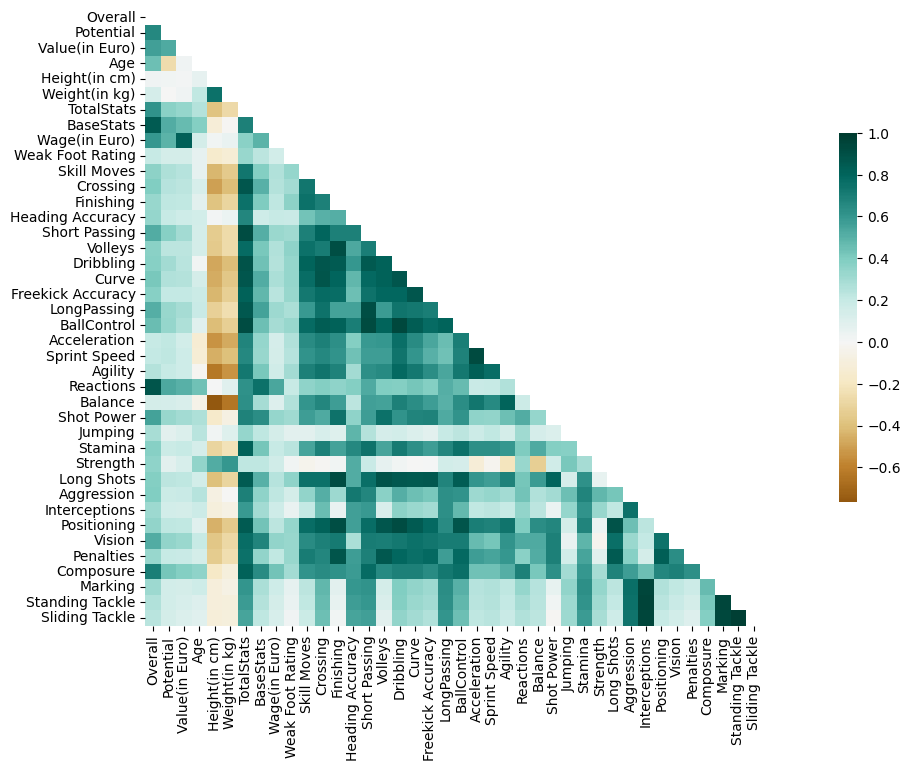

In [218]:
# Calculamos correlaciones
corr = dfmodel.corr(method = 'pearson')

# Máscara para que no se vea por duplicado los valores de correlaciones:
mask = np.triu(np.ones_like(corr, dtype = np.bool))

# Crear figura de matplotlib
f, ax = plt.subplots(figsize =(20,8))

# Dibujamos el heatmap de correlaciones con todos los atributos que hemos creado
sns.heatmap(corr, mask = mask, cmap = 'BrBG', vmax = 1, center = 0, square = True, annot= False, fmt= '.2f', cbar_kws={'shrink': 0.6})

In [219]:
dfmodel.corr()['Potential'].sort_values().head(5)

Age             -0.262745
Weight(in kg)   -0.004111
Height(in cm)    0.018018
Strength         0.079813
Jumping          0.085505
Name: Potential, dtype: float64

In [220]:
#Eliminamos Altura y Peso porque son las menos correlacionadas, practicamente 0
dfmodel.drop(['Height(in cm)', 'Weight(in kg)'], axis=1, inplace=True)

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2140\194778991.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2 de nuestras variables son objects. Por lo que habrá que codificarlas <br>


In [221]:
dfmodel['Attacking Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)
dfmodel['Defensive Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2140\3192088427.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2140\3192088427.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
dfmodel

,Overall,Potential,Value(in Euro),Age,TotalStats,BaseStats,Wage(in Euro),Weak Foot Rating,Skill Moves,Attacking Work Rate,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
0,91,91,54000000,35,2190,452,195000,4,4,33,...,91,44,40,93,94,75,96,20,35,24
1,91,91,64000000,34,2147,455,450000,4,4,66,...,80,63,39,92,89,84,90,43,24,18
2,91,91,84000000,33,2205,458,420000,4,4,99,...,84,81,49,94,81,90,88,35,42,19
3,91,91,107500000,31,2303,483,350000,5,4,99,...,91,75,66,88,94,83,89,68,65,53
4,91,95,190500000,23,2177,470,230000,4,5,99,...,82,64,38,92,83,80,88,26,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,110000,21,1287,274,500,3,2,66,...,46,37,22,50,52,40,47,39,29,27
18535,47,57,90000,17,1289,267,500,3,2,66,...,35,52,46,35,40,33,45,46,50,52
18536,47,67,130000,18,1333,277,500,3,2,99,...,36,39,24,42,50,43,59,39,37,48
18537,47,61,100000,17,1113,226,500,3,2,66,...,18,42,54,23,32,37,41,50,54,54


In [223]:
#Separamos el dataset en train y test dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfmodel, test_size=0.075, random_state=10)

In [224]:
#Creamos las variables de train y test
X_train = train.drop(["Potential"], axis=1)
Y_train = train["Potential"]
X_test  = test.drop(["Potential"], axis=1)
Y_test = test["Potential"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((17038, 39), (17038,), (1382, 39), (1382,))

In [225]:
from sklearn.metrics import mean_squared_error

### ElasticNet

In [235]:
#Librerías
from sklearn.linear_model import ElasticNet
#Inicializamos modelo y parámetros
alpha = .15 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .15 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 200, random_state = 10)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
prediccionEN = model.predict(X_test)
mse_ElasticNet = mean_squared_error(Y_test, prediccionEN)

c:\Users\jl_12\.vscode\samplerepo\venv_analytics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.628e+04, tolerance: 6.502e+01



### SGD Regressor

In [244]:
#Librerías
from sklearn.linear_model import SGDRegressor
#Inicializamos modelo y parámetros
penalty = 'elasticnet' #Elegimos entre penalización 'l2', 'l1' o 'elasticnet'
alpha = .1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 10)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
prediccionSGD = model.predict(X_test)
mse_SGDRegressor = mean_squared_error(Y_test, prediccionSGD)

### SVM

In [251]:
#Librerías
from sklearn import svm
#Inicializamos modelo y parámetros
C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
prediccionSVR = model.predict(X_test)
mse_SVR = mean_squared_error(Y_test, prediccionSVR)

### Random Forest Regressor

In [239]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'mse' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
prediccionRF = model.predict(X_test)
mse_RF = mean_squared_error(Y_test, prediccionRF)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   36.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


### XGB Boost

In [245]:
#Librerías
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
#Convertimos los datos a formato DMatrix
train_data = xgb.DMatrix(X_train, label=Y_train)
test_data = xgb.DMatrix(X_test, label=Y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
prediccionXGB = model.predict(test_data)
mse_XGB = mean_squared_error(Y_test, prediccionXGB)

### Resultados y comparativa

In [253]:
mse = [mse_ElasticNet, mse_SVR, mse_RF, mse_XGB]
modelos = ['ElasticNet', 'SVR', 'RF', 'XGB']

fig = px.scatter(x=modelos, y= mse, height=400, width=600)
fig.update_layout(yaxis_title=None, xaxis_title = None)
fig.show()


Recuperamos nuestro resultado con random forest

In [248]:
prediccionRF

array([61.585, 70.785, 68.   , ..., 73.82 , 77.365, 72.12 ])

Guardamos los resultados del test y de la predicción para compararlos en un Scatter

In [203]:
ejey = np.array(Y_test)

In [249]:
px.scatter(x = ejey, y = prediccionRF)

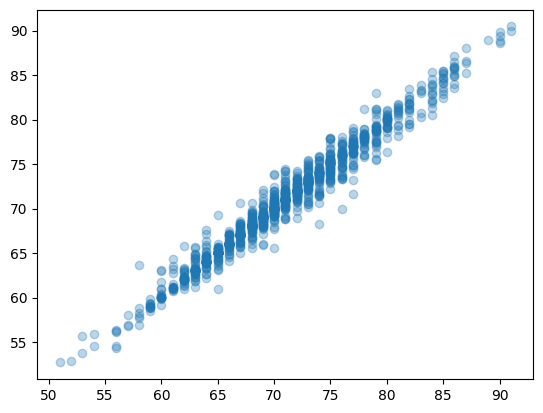

In [250]:
plt.scatter(ejey, prediccionRF, alpha=0.3)

# Alineaciones  (EXPERIMENTAL)

In [83]:
formations_dict = {'4-3-1-2': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '4-3-2-1': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CAM|CF', 'CF|ST'],
                   '4-3-3': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'RW|RM', 'CF|ST', 'LW|LF|ST'],
                   '4-4-2': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '4-5-1': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '3-4-1-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '3-4-3': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RWB|RM', 'CDM|CM', 'CDM|CM', 'LWB|LM', 'RW|RF|ST', 'CF|ST', 'LW|LF|ST'],
                   '3-5-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RWB|RB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'LM|LWB|LB', 'CF|ST', 'CF|ST']}

In [84]:
df['Position'].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [85]:
# player position in each line in playground.
position = {'deffender':['RB','LB','CB','RWB','LWB'],
             'midder':['RM','LM','CM','CAM','CDM'],
             'attacker':['CF','ST','RW','LW']
            }
lineup = [3,4,3]
#lineup = [4,3,3]
#lineup = [5,3,2]
#lineup = [3,5,2]
#lineup = [4,5,1]
#lineup = [4,4,2]

In [86]:
# function that get best squad in the world based on your Lineup.
def get_best_squad(lineup):
    best_squad = df[df['Position'] == 'GK'].sort_values('Overall',ascending=False).iloc[0:1]
    for j, k in zip(position.keys(),range(3)):
        best = []
        for i in position.get(j):
            best.append(df[df['Position'] == i].sort_values(['Overall','Potential'], ascending=[False,False]).iloc[0])
        best = pd.DataFrame(best).sort_values(['Overall','Potential'], ascending=[False,False])
        best = best.iloc[0:lineup[k]]
        best_squad = pd.concat([best_squad, best])
    return best_squad

In [87]:
# get best squad on the world based on lineup which you select.
best_sqaud = get_best_squad(lineup)
best_sqaud.reset_index(inplace=True)
player_index = list(best_sqaud.loc[:,['index']].values.reshape(11,))
best_sqaud.drop('index',axis=1,inplace=True)
best_sqaud

,Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Type,alpha3
0,Thibaut Courtois,90,91,90000000,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,96,...,34,32,34,32,32,32,32,90,Gold,BEL
1,Virgil van Dijk,90,90,98000000,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,193,92,...,73,83,88,83,85,90,85,23,Gold,NLD
2,João Pedro Cavaco Cancelo,88,88,82500000,LB,Portugal,https://cdn.sofifa.net/players/210/514/23_60.png,28,182,74,...,88,88,86,88,87,82,87,22,Gold,PRT
3,Theo Hernández,85,90,76000000,LWB,France,https://cdn.sofifa.net/players/232/656/23_60.png,24,184,81,...,84,86,82,86,85,82,85,20,Gold,FRA
4,Kevin De Bruyne,91,91,107500000,CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,...,91,82,82,82,78,72,78,24,Gold,BEL
5,Lionel Messi,91,91,54000000,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,...,91,67,66,67,62,53,62,22,Gold,ARG
6,Joshua Kimmich,89,90,105500000,CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,177,75,...,86,87,89,87,86,84,86,24,Gold,DEU
7,Sadio Mané,89,89,99500000,LM,Senegal,https://cdn.sofifa.net/players/208/722/23_60.png,30,174,69,...,89,71,68,71,68,62,68,22,Gold,SEN
8,Kylian Mbappé,91,95,190500000,ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,...,92,70,66,70,66,57,66,21,Gold,FRA
9,Karim Benzema,91,91,64000000,CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,...,89,67,67,67,63,58,63,21,Gold,FRA


### PLOT cancha  ver como implementar

In [91]:
# https://towardsdatascience.com/rendering-images-inside-a-pandas-dataframe-3631a4883f60
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [92]:
df['Image HTML'] = path_to_image_html(df['Image Link'])

In [105]:
from mplsoccer import Pitch, VerticalPitch

In [106]:
pitch = VerticalPitch(pitch_type='statsbomb', half=False, pitch_color='green', line_color='#b0b0b0', 
    linewidth=2, line_zorder=0.9, linestyle=None, stripe=False, stripe_color='#c2d59d', 
    stripe_zorder=0.6, pad_left=4, pad_right=4, pad_bottom=4, pad_top=4, positional=False, 
    positional_zorder=0.8, positional_linewidth=2, positional_linestyle=None, positional_color='#eadddd', 
    shade_middle=False, shade_color='#f2f2f2', shade_zorder=0.7, pitch_length=None, pitch_width=None, 
    goal_type='line', goal_alpha=1, line_alpha=1, label=False, tick=False, axis=False, spot_scale=0.002, 
    corner_arcs=False)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

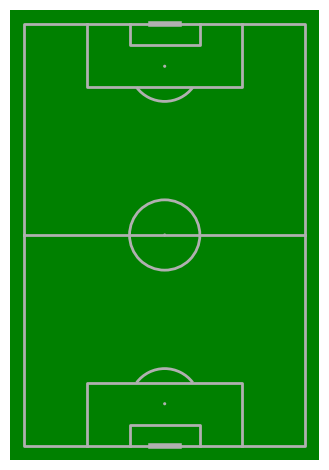

In [107]:
pitch.draw()